# Module 7: Generalization Performance 

* Consider the fit of the following three models (red lines) to the blue circles

![alt text](figures/gen_training.jpg)

* The middle model has the smallest MSE and it looks to be the most complex

* But, look at what happens when we measure MSE on data points the models have not been trained on:

![alt text](figures/gen_testing.jpg)

* The most complex model has the worst MSE on unseen data, despite having the best MSE on the training data

* We say that the model has _overfitted_ to the training dataset: it mistook noise for an actual signal.

* This is why we _must_ evaluate our models on data the model has not been trained on

## Tracking Training and Testing Performance

* Before we do that, lets see how our neural network models can overfit. 

* We'll take this opportuntiy to introduce a high-level framework called Keras. Keras sits on top of tensorflow and makes building, training, and running common neural networks much easier.

* We'll withhold 20% of the data for testing and plot how the loss on training and testing changes over time.


In [53]:
# necessary imports
import numpy as np
import numpy.random as rng 
import tensorflow as tf
import matplotlib.pyplot as plt 
import sklearn.metrics
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.utils import to_categorical
import scipy.stats

In [54]:
data = np.load('data/multiclass_classification_hard.npz')
X, y = data['X'], data['y']

# shuffle order
ix = rng.permutation(X.shape[0])
X = X[ix, :]
y = to_categorical(y[ix, :])

In [55]:
# number of hidden units
n_hidden = 30

# notice that we don't specify the first dimension in the input 
# shape, Keras infers that automatically
# the trailing comma is important! don't forget it
input_node = layers.Input(shape=(X.shape[1],))
hidden_layer = layers.Dense(n_hidden, activation='tanh')(input_node)
output_node = layers.Dense(y.shape[1], activation='softmax')(hidden_layer)
model = keras.models.Model(inputs=input_node, outputs=output_node)
model.compile('sgd', 'categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_18 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 186       
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
# train the model
h = model.fit(x = X, y=y, verbose=True, validation_split=0.2, epochs=100, batch_size=5)

Epoch 1/100
 38/160 [======>.......................] - ETA: 0s - loss: 1.6091 - acc: 0.3789   

2021-12-03 15:36:04.846790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - 1s 5ms/step - loss: 1.1318 - acc: 0.5800 - val_loss: 0.8880 - val_acc: 0.6900
Epoch 2/100
 13/160 [=>............................] - ETA: 0s - loss: 0.6480 - acc: 0.8154

2021-12-03 15:36:05.572459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - 1s 5ms/step - loss: 0.6948 - acc: 0.7637 - val_loss: 0.7467 - val_acc: 0.7250
Epoch 3/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5861 - acc: 0.8087 - val_loss: 0.6675 - val_acc: 0.7550
Epoch 4/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5227 - acc: 0.8225 - val_loss: 0.6191 - val_acc: 0.7650
Epoch 5/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4771 - acc: 0.8512 - val_loss: 0.5829 - val_acc: 0.7700
Epoch 6/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4434 - acc: 0.8625 - val_loss: 0.5530 - val_acc: 0.7950
Epoch 7/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4149 - acc: 0.8787 - val_loss: 0.5255 - val_acc: 0.8000
Epoch 8/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3908 - acc: 0.8762 - val_loss: 0.5038 - val_acc: 0.8000
Epoch 9/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3686

(0.0, 0.6)

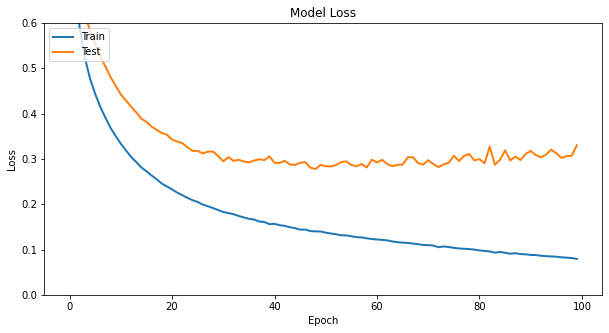

In [59]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['loss'], linewidth=2)
ax.plot(h.history['val_loss'], linewidth=2)
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
ax.set_ylim([0, 0.6])

* Notice how, initially, both training and testing losses decrease but then as the training loss continues decreasing, the testing loss starts increasing!

(0.8, 1.0)

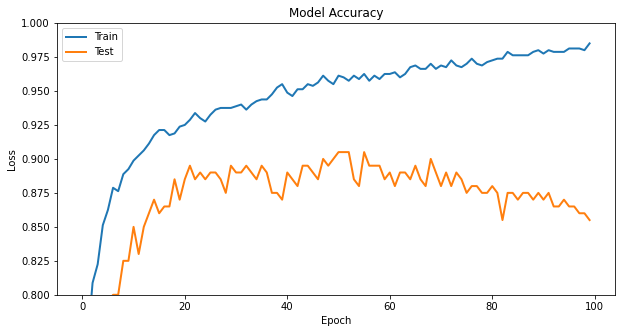

In [60]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['acc'], linewidth=2)
ax.plot(h.history['val_acc'], linewidth=2)
ax.set_title('Model Accuracy')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
ax.set_ylim([0.8, 1.0])

## Fighting Overfitting: Dropout

* With dropout, neurons are randomly "turned-off" with some probability $p$.
* The theory behind dropout is that it encourages neurons to specialize and not rely on other neurons
* Special care has to be taken when using dropout because it changes the expected value of the output of the neurons
* Fortunately, Keras takes care of this detail for us
* Let's add dropout to our earlier example

In [26]:
# number of hidden units
n_hidden = 30
dropout_p = 0.5

input_node = layers.Input(shape=(X.shape[1],))
hidden_layer = layers.Dense(n_hidden, activation='tanh')(input_node)
hidden_layer = layers.Dropout(rate=dropout_p)(hidden_layer)
output_node = layers.Dense(y.shape[1], activation='softmax')(hidden_layer)
model = keras.models.Model(inputs=input_node, outputs=output_node)
model.compile('sgd', 'categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                390       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 186       
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# train the model
h = model.fit(x = X, y=y, verbose=True, validation_split=0.2, epochs=100, batch_size=5)

Epoch 1/100
 23/160 [===>..........................] - ETA: 0s - loss: 2.2471 - acc: 0.1913    

2021-12-03 13:49:22.858178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - 1s 6ms/step - loss: 1.4253 - acc: 0.4512 - val_loss: 0.8403 - val_acc: 0.7000
Epoch 2/100
 12/160 [=>............................] - ETA: 0s - loss: 0.9836 - acc: 0.6333

2021-12-03 13:49:23.660858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - 1s 5ms/step - loss: 0.9291 - acc: 0.6312 - val_loss: 0.6748 - val_acc: 0.7550
Epoch 3/100
160/160 [==============================] - 1s 5ms/step - loss: 0.7681 - acc: 0.7138 - val_loss: 0.6202 - val_acc: 0.7850
Epoch 4/100
160/160 [==============================] - 1s 5ms/step - loss: 0.7012 - acc: 0.7337 - val_loss: 0.5627 - val_acc: 0.8050
Epoch 5/100
160/160 [==============================] - 1s 5ms/step - loss: 0.6591 - acc: 0.7487 - val_loss: 0.5427 - val_acc: 0.8050
Epoch 6/100
160/160 [==============================] - 1s 5ms/step - loss: 0.6038 - acc: 0.7862 - val_loss: 0.5075 - val_acc: 0.8200
Epoch 7/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5919 - acc: 0.7887 - val_loss: 0.4894 - val_acc: 0.8200
Epoch 8/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5658 - acc: 0.7937 - val_loss: 0.4611 - val_acc: 0.8300
Epoch 9/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5490

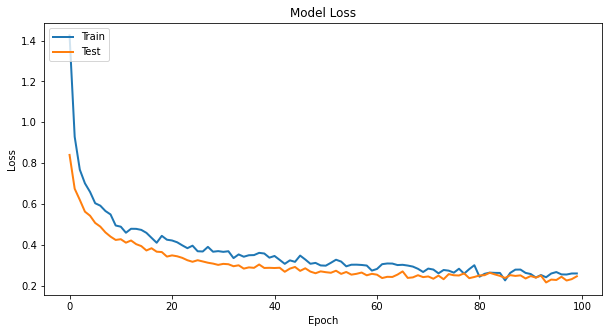

In [30]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['loss'], linewidth=2)
ax.plot(h.history['val_loss'], linewidth=2)
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')

(0.8, 1.0)

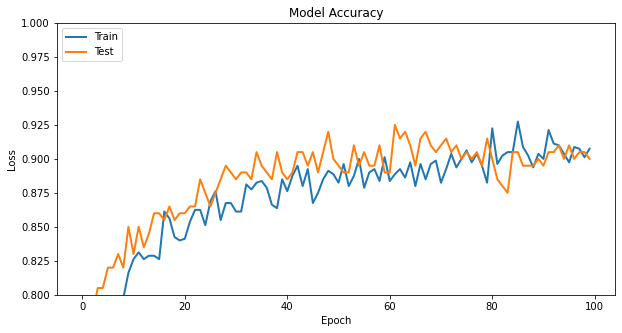

In [31]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['acc'], linewidth=2)
ax.plot(h.history['val_acc'], linewidth=2)
ax.set_title('Model Accuracy')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
ax.set_ylim([0.8, 1.0])

* Notice how the testing loss pretty much tracks the training loss
* The final accuracy is 90% for both training and testing. Recall that without dropout, the final test accuracy dropped to 87.5

## Fighting Overfitting: Regularization

* An extra term is a added to the loss function to penalize network weights that are too large. For example, the common L2 regularization scheme adds a summation of all network weights squared:

$$\mathcal{L}(\hat{y}_{i},y_{i})=\mathcal{L}_{MSE}(\hat{y}_{i},y_{i})+0.5\lambda\sum_{j}w_{j}^{2}$$

* L2 regularization encourages diffuse weight vectors and discourages vectors with large individual weights

* The regularization parameter $\lambda$ has to be determined ahead of time

In [32]:
import tensorflow.keras.regularizers as reg 

# number of hidden units
n_hidden = 30

# L2 regularization penalty term, try different values [0.001, 0.01, 0.1, 1.]
l2_penalty = 0.05


# notice that we don't specify the first dimension in the input 
# shape, Keras infers that automatically
# the trailing comma is important! don't forget it
input_node = layers.Input(shape=(X.shape[1],))
hidden_layer = layers.Dense(n_hidden, activation='tanh', kernel_regularizer=reg.l2(l2_penalty))(input_node)
output_node = layers.Dense(y.shape[1], activation='softmax', kernel_regularizer=reg.l2(l2_penalty))(hidden_layer)
model = keras.models.Model(inputs=input_node, outputs=output_node)
model.compile('sgd', 'categorical_crossentropy', metrics=['acc'])
print(model.summary())


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 186       
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# train the model
h = model.fit(x = X, y=y, verbose=False, validation_split=0.2, epochs=100, batch_size=5)

2021-12-03 13:57:05.644285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-03 13:57:06.402536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


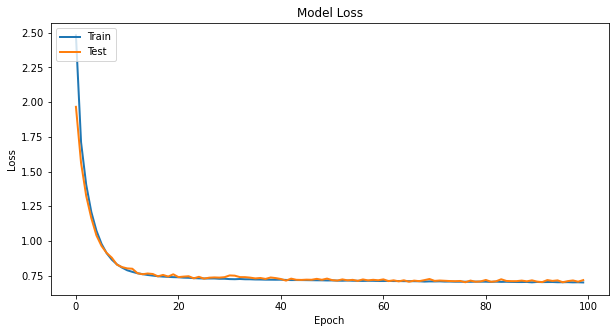

In [35]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['loss'], linewidth=2)
ax.plot(h.history['val_loss'], linewidth=2)
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')

0.9300000071525574


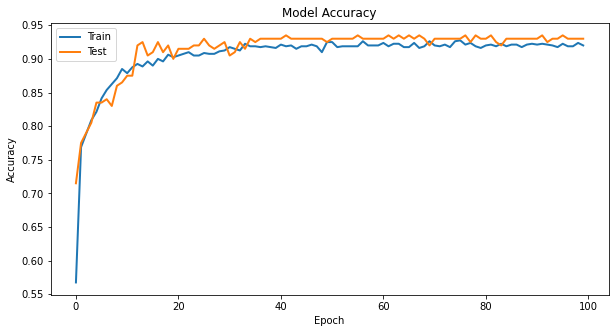

In [36]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['acc'], linewidth=2)
ax.plot(h.history['val_acc'], linewidth=2)
ax.set_title('Model Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
print(h.history['val_acc'][-1])

* Dropout tends to make convergence slower 

## Fighting Overfitting: Early-Stopping

* Why don't we just run the model, and pick the point at which the test loss stops decreasing?

* That's a huge ***NO NO***. By doing so, you are implicitly training on the test set, even though you are not applying gradient descent directly to it.

* But, this does provide us with an idea: what if we split the training set further into a _real_ training set and a validation set.

* We train the model on the real training set and monitor the loss on the validation set. And pick the model with the lowest validation error.

* To do this with Keras, we use the concept of _callbacks_. 

* A callback is a function that gets called at the end of every epoch.

* We need two callbacks: one to stop training when the validation loss starts increasing, and one to save the model parameter at that point.

In [37]:
import tensorflow.keras.callbacks

In [38]:
callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [43]:
# number of hidden units
n_hidden = 30


# build model
input_node = layers.Input(shape=(X.shape[1],))
hidden_layer = layers.Dense(n_hidden, activation='tanh')(input_node)
output_node = layers.Dense(y.shape[1], activation='softmax')(hidden_layer)
model = keras.models.Model(inputs=input_node, outputs=output_node)
model.compile('sgd', 'categorical_crossentropy', metrics=['acc'])
print(model.summary())


# split data into training, validation, and testing
n_train_prop = 0.6
n_valid_prop = 0.2
n_test_prop = 0.2

ix = rng.permutation(X.shape[0])

n_train = int(n_train_prop * X.shape[0])
n_valid = int(n_valid_prop * X.shape[0])
n_test = X.shape[0] - n_train - n_valid 

train_ix = ix[:n_train]
valid_ix = ix[n_train:(n_train + n_valid)]
test_ix = ix[(n_train + n_valid):]

Xtrain, ytrain = X[train_ix, :], y[train_ix]
Xvalid, yvalid = X[valid_ix, :], y[valid_ix]
Xtest, ytest = X[test_ix, :], y[test_ix]

Xvalid.shape

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 186       
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________
None


(200, 12)

In [45]:
model.fit(
        x=Xtrain,
        y=ytrain,
        batch_size=5,
        epochs=100,
        verbose=True,
        validation_data=(Xvalid, yvalid),
        callbacks=callbacks)

Epoch 1/100
 37/120 [========>.....................] - ETA: 0s - loss: 0.3424 - acc: 0.8757

2021-12-03 14:19:11.406787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 1s 4ms/step - loss: 0.3637 - acc: 0.8783 - val_loss: 0.4763 - val_acc: 0.8100
Epoch 2/100
120/120 [==============================] - 1s 4ms/step - loss: 0.3451 - acc: 0.8900 - val_loss: 0.4692 - val_acc: 0.8200
Epoch 3/100
120/120 [==============================] - 1s 4ms/step - loss: 0.3292 - acc: 0.8983 - val_loss: 0.4511 - val_acc: 0.8300
Epoch 4/100
120/120 [==============================] - 1s 4ms/step - loss: 0.3149 - acc: 0.9167 - val_loss: 0.4382 - val_acc: 0.8300
Epoch 5/100
120/120 [==============================] - 1s 4ms/step - loss: 0.3021 - acc: 0.9183 - val_loss: 0.4275 - val_acc: 0.8350
Epoch 6/100
120/120 [==============================] - 1s 4ms/step - loss: 0.2872 - acc: 0.9233 - val_loss: 0.4181 - val_acc: 0.8400
Epoch 7/100
120/120 [==============================] - 1s 4ms/step - loss: 0.2775 - acc: 0.9350 - val_loss: 0.4086 - val_acc: 0.8450
Epoch 8/100
120/120 [==============================] - 1s 4ms/step - loss: 0.2671

In [47]:
preds = model.predict(Xtest)

acc = sklearn.metrics.accuracy_score(np.argmax(ytest, axis=1), np.argmax(preds, 1))
print("Accuracy: %0.2f" % acc)

Accuracy: 0.84


2021-12-03 14:19:52.273314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.905
